#MobileNet - SSD
updated: 2024-01-22

In [9]:
#Clone the repository
!git clone --depth 1 https://github.com/IPHOS-RWU/3DMV

Cloning into '3DMV'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 60 (delta 6), reused 55 (delta 6), pack-reused 0
Receiving objects: 100% (60/60), 6.44 MiB | 16.33 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [1]:
!git clone https://github.com/chuanqi305/MobileNet-SSD/  # clone

Cloning into 'MobileNet-SSD'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 203 (delta 0), reused 3 (delta 0), pack-reused 197
Receiving objects: 100% (203/203), 21.45 MiB | 27.49 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [2]:
proto_file = "MobileNet-SSD/deploy.prototxt"
model_file = "MobileNet-SSD/mobilenet_iter_73000.caffemodel"

In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
net = cv2.dnn.readNetFromCaffe(proto_file,model_file)

In [5]:
#——Class Labels of the model——–#

classNames = { 0: 'background',

    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',

    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',

    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',

    14: 'motorbike', 15: 'person', 16: 'pottedplant',

    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

In [6]:
input_shape=(300,300) #the required shape for the input image to pass to our model

mean = (127.5,127.5,127.5) #we’ll have to normalize the image pixels, and we’ll use this mean value to do that

scale = 0.007843 # then finally we’ll scale the image to meet the input criteria of the model

In [10]:
img = cv2.imread("3DMV/images/Dog_Cat.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
blob = cv2.dnn.blobFromImage(img,

                             scalefactor=scale,

                             size=input_shape,

                             mean=mean,

                             swapRB=True) #since our image is already in the BGR form because opencv by default reads it in BGR format

Make Predictions using the model


In [12]:
net.setInput(blob)

#—–using the model to make predictions

results = net.forward()

In [13]:
for i in range(results.shape[2]):

      # confidence
    confidence = round(results[0, 0, i, 2],2)
    if confidence > 0.7:

          # class id
        id = int(results[0, 0, i, 1])

        # 3-6 contains the coordinate
        x1, y1, x2, y2 = results[0, 0, i, 3:7]

        # print(x1,y1,x2,y2)
        # scale these coordinates to out image pixel
        ih, iw, ic = img.shape
        x1, x2 = int(x1*iw), int(x2*iw)
        y1, y2 = int(y1 * ih), int(y2 * ih)
        cv2.rectangle(img,
                      (x1, y1),
                      (x2, y2),
                      (0, 200, 0), 2)
        cv2.putText(img, f'{classNames[id]}:{confidence*100}',
                    (x1+30, y1-30),
                    cv2.FONT_HERSHEY_DUPLEX,
                    1, (255, 0, 0), 1)

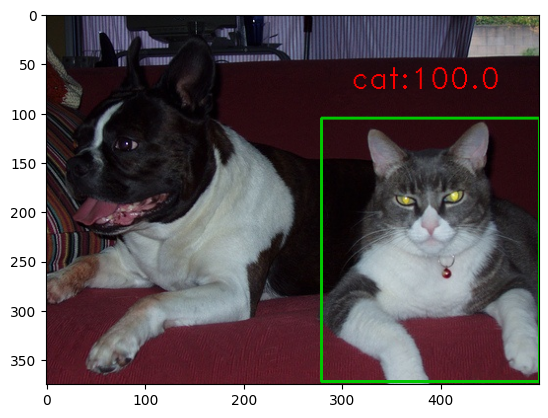

In [14]:
plt.imshow(img)